In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X= np.load('X.npy')
y = np.load('Y.npy')

In [3]:
indices = tf.range(start=0, limit=tf.shape(X)[0], dtype=tf.int32)
idx = tf.random.shuffle(indices,seed=0)
X = tf.gather(X, idx)
y = tf.gather(y, idx)

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
X_train = X[0:1600]
X_test = X[1600:len(X)]
y_train = y[0:1600]
y_test = y[1600:len(X)]

In [6]:
X_test.shape

(462, 64, 64)

In [7]:
X_train = X_train.reshape(1600,64,64,1)
X_test = X_test.reshape(462,64,64,1)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(64,64,1)))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64,kernel_size=(4,4)))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop",metrics=['accuracy'])

In [10]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [11]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 1600 samples, validate on 462 samples
Epoch 1/30
1600/1600 [==============================] - 26s 16ms/sample - loss: 2.4509 - accuracy: 0.1488 - val_loss: 2.1954 - val_accuracy: 0.2424
Epoch 2/30
1600/1600 [==============================] - 23s 14ms/sample - loss: 1.4322 - accuracy: 0.5163 - val_loss: 0.8819 - val_accuracy: 0.6926
Epoch 3/30
1600/1600 [==============================] - 22s 14ms/sample - loss: 0.7037 - accuracy: 0.7644 - val_loss: 0.6137 - val_accuracy: 0.7944
Epoch 4/30
1600/1600 [==============================] - 21s 13ms/sample - loss: 0.4799 - accuracy: 0.8450 - val_loss: 0.5523 - val_accuracy: 0.8139
Epoch 5/30
1600/1600 [==============================] - 21s 13ms/sample - loss: 0.3305 - accuracy: 0.8894 - val_loss: 0.4922 - val_accuracy: 0.8355
Epoch 6/30
1600/1600 [==============================] - 19s 12ms/sample - loss: 0.2099 - accuracy: 0.9406 - val_loss: 0.4462 - val_accuracy: 0.8485
Epoch 7/30
1600/1600 [==============================] - 25s 15ms/

In [12]:
model.evaluate(X_test,y_test,verbose=0)

[0.5253189139035873, 0.8636364]

In [13]:
y_test[78]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [14]:
q = model.predict_classes(X_test)

In [15]:
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
l = confusion_matrix(q,y_classes)

In [18]:
l

array([[38,  0,  0,  0,  0,  2,  2,  2,  0,  0],
       [ 0, 47,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  2,  0,  1,  1,  0,  1,  0],
       [ 1,  2,  1, 43,  0,  2,  7,  0,  1,  0],
       [ 2,  0,  1,  0, 44,  1,  0,  0,  1,  0],
       [ 2,  0,  2,  0,  0, 43,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0, 36,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0,  0, 33,  1,  0],
       [ 0,  0,  7,  4,  2,  0,  0,  6, 43,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0,  0, 37]], dtype=int64)

In [19]:
df = pd.DataFrame(l)

In [20]:
import seaborn as sns

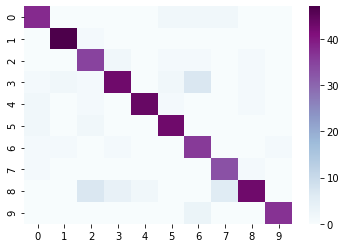

In [21]:
sns.heatmap(l,cmap="BuPu")

In [22]:
model.save("model_1.h5")

In [23]:
metrics = pd.DataFrame(model.history.history)

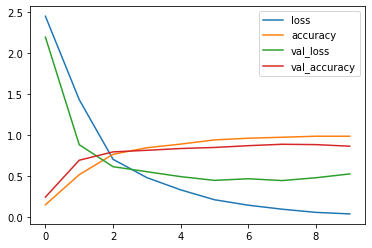

In [24]:
metrics.plot()

In [25]:
m=111
a = X_test[m].reshape(64,64)

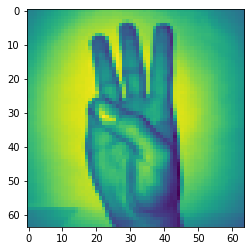

In [26]:
plt.imshow(a)

In [27]:
y_test[m]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [28]:
q[m]

3

In [29]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(64,64,1)))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64,kernel_size=(4,4)))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128,kernel_size=(4,4)))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512))
model.add(LeakyReLU())

model.add(Dense(256))
model.add(LeakyReLU())

model.add(Dense(128))
model.add(LeakyReLU())

model.add(Dense(10,activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop",metrics=['accuracy'])

In [30]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 1600 samples, validate on 462 samples
Epoch 1/30
1600/1600 [==============================] - 25s 16ms/sample - loss: 2.3790 - accuracy: 0.1119 - val_loss: 2.2318 - val_accuracy: 0.2597
Epoch 2/30
1600/1600 [==============================] - 18s 12ms/sample - loss: 1.3936 - accuracy: 0.5169 - val_loss: 0.7667 - val_accuracy: 0.7489
Epoch 3/30
1600/1600 [==============================] - 23s 14ms/sample - loss: 0.5861 - accuracy: 0.8025 - val_loss: 0.4969 - val_accuracy: 0.8247
Epoch 4/30
1600/1600 [==============================] - 22s 14ms/sample - loss: 0.3659 - accuracy: 0.8788 - val_loss: 0.3269 - val_accuracy: 0.8983
Epoch 5/30
1600/1600 [==============================] - 22s 14ms/sample - loss: 0.2850 - accuracy: 0.9112 - val_loss: 0.2934 - val_accuracy: 0.9026
Epoch 6/30
1600/1600 [==============================] - 21s 13ms/sample - loss: 0.1908 - accuracy: 0.9388 - val_loss: 0.3205 - val_accuracy: 0.9069
Epoch 7/30
1600/1600 [==============================] - 23s 14ms/

In [31]:
model.evaluate(X_test,y_test,verbose=0)

[0.32503008532833744, 0.9025974]

In [32]:
model.save("model_2.h5")

In [33]:
metrics = pd.DataFrame(model.history.history)

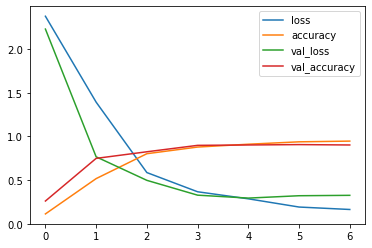

In [34]:
metrics.plot()

In [35]:
q = model.predict_classes(X_test)
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
l = confusion_matrix(q,y_classes)
print(l)

[[42  0  0  0  0  0  1  0  0  0]
 [ 0 50  1  0  0  1  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  1  5  0  0  0]
 [ 0  0  2  0 44  1  0  1  4  0]
 [ 2  0  4  0  0 46  6  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 1  0  0  0  0  0  0 39  0  0]
 [ 0  0  5  5  2  0  1  1 43  0]
 [ 0  0  0  0  0  0  1  0  0 38]]


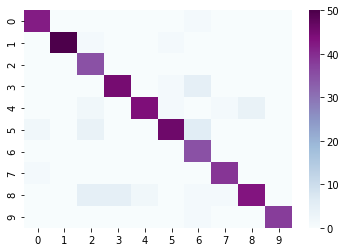

In [36]:
sns.heatmap(l,cmap="BuPu")

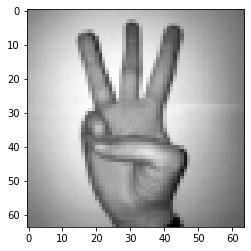

In [37]:
m=156
a = X_test[m].reshape(64,64)
plt.imshow(a,cmap='gray')

In [38]:
q[m]

8